# Doodling with ChEMBL 

In [1]:
import os 
import numpy as np 
import pandas as pd 
import sys 
import gzip
import pickle

In [2]:
# RDkit imports
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules

print(rdkit.__version__)

Chem.WrapLogs()
lg = rdkit.RDLogger.logger() 
lg.setLevel(rdkit.RDLogger.CRITICAL)

2021.03.5


In [3]:
chembl_path = '/lrlhps/users/l017301/SHARE/doodle/DATA/ChEMBL_dataset/clean_chembl.pkl.gz'

In [4]:
with gzip.open(chembl_path,'rb') as f:
    chembl_df = pickle.load(f)

In [5]:
chembl_df.shape

(314767, 34)

In [23]:
np.unique(chembl_df['Smiles']).shape

(204077,)

In [6]:
chembl_df.sample(2)

,Smiles,Mol,TC_key,BIOACT_PCHEMBL_VALUE,TGT_CHEMBL_ID,TGT_ORGANISM,TGT_TID,CMP_ACD_LOGD,CMP_ACD_LOGP,CMP_ALOGP,...,CMP_RTB,CMP_STANDARD_INCHI_KEY,CMP_STRUCTURE_TYPE,DOC_YEAR,CMP_MOLECULAR_SPECIES_ACID,CMP_MOLECULAR_SPECIES_BASE,CMP_MOLECULAR_SPECIES_NEUTRAL,CMP_MOLECULAR_SPECIES_ZWITTERION,CMP_TYPE_SMALL_MOLECULE,CMP_TYPE_PROTEIN
227706,O=C(O)c1[nH]c2c([N+](=O)[O-])cccc2c1-c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x2ba14e36c870>,CHEMBL3975 - CHEMBL3127752,4.90,CHEMBL3975,Homo sapiens,11415,2.98,3.03,3.46,...,3,BQXZKLVLIANTAV-UHFFFAOYSA-N,MOL,2014,0,0,0,1,1,0
175290,O=S(=O)(c1cccc2ccccc12)c1nn(Cc2ccccc2)c2ccc(N3...,<rdkit.Chem.rdchem.Mol object at 0x2ba14dae9870>,CHEMBL3371 - CHEMBL1278001,8.12,CHEMBL3371,Homo sapiens,10627,3.42,4.69,5.40,...,5,CPKUIKQUAANRIQ-UHFFFAOYSA-N,MOL,2010,0,0,0,1,1,0


In [32]:
chembl_df['TGT_ORGANISM'].value_counts()

Homo sapiens                            237081
Rattus norvegicus                        29616
Mus musculus                              9609
Cavia porcellus                           8461
Human immunodeficiency virus 1            4616
                                         ...  
Brucella suis biovar 1 (strain 1330)        29
Streptococcus pneumoniae                    28
Vibrio harveyi                              25
Methanosarcina thermophila                  24
Crithidia fasciculata                       13
Name: TGT_ORGANISM, Length: 84, dtype: int64

In [7]:
chembl_df.columns

Index(['Smiles', 'Mol', 'TC_key', 'BIOACT_PCHEMBL_VALUE', 'TGT_CHEMBL_ID',
       'TGT_ORGANISM', 'TGT_TID', 'CMP_ACD_LOGD', 'CMP_ACD_LOGP', 'CMP_ALOGP',
       'CMP_AROMATIC_RINGS', 'CMP_CHEMBL_ID', 'CMP_FULL_MWT', 'CMP_HBA',
       'CMP_HBD', 'CMP_HEAVY_ATOMS', 'CMP_INORGANIC_FLAG', 'CMP_LOGP',
       'CMP_MED_CHEM_FRIENDLY', 'CMP_MOLREGNO', 'CMP_NUM_ALERTS',
       'CMP_NUM_RO5_VIOLATIONS', 'CMP_PSA', 'CMP_RO3_PASS', 'CMP_RTB',
       'CMP_STANDARD_INCHI_KEY', 'CMP_STRUCTURE_TYPE', 'DOC_YEAR',
       'CMP_MOLECULAR_SPECIES_ACID', 'CMP_MOLECULAR_SPECIES_BASE',
       'CMP_MOLECULAR_SPECIES_NEUTRAL', 'CMP_MOLECULAR_SPECIES_ZWITTERION',
       'CMP_TYPE_SMALL_MOLECULE', 'CMP_TYPE_PROTEIN'],
      dtype='object')

<AxesSubplot:>

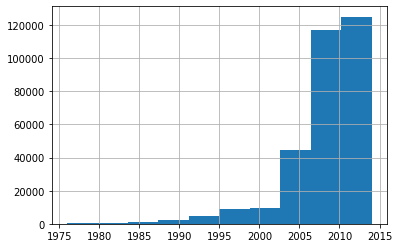

In [24]:
chembl_df['DOC_YEAR'].hist()

<AxesSubplot:>

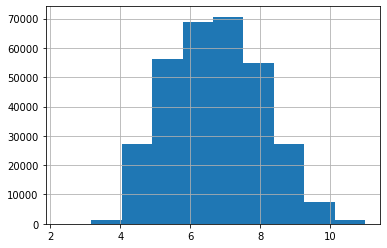

In [8]:
chembl_df['BIOACT_PCHEMBL_VALUE'].hist()

In [28]:
def convert_to_cat(panda_series):
    
    cat_list = [42] * len(panda_series) 

    for i, entry in enumerate(panda_series):
        if float(entry) >= 6.5: 
            cat_list[i] = 1
        else:
            cat_list[i] = 0
    
    return cat_list

In [29]:
chembl_df['active_cat'] = convert_to_cat(chembl_df['BIOACT_PCHEMBL_VALUE'])

In [30]:
chembl_df['active_cat'].value_counts(normalize=True)*100

1    55.144917
0    44.855083
Name: active_cat, dtype: float64

In [15]:
null_columns=chembl_df.columns[chembl_df.isnull().any()]
chembl_df[null_columns].isnull().sum()

CMP_ACD_LOGD    586
dtype: int64

In [ ]:
chembl_df_predictions = chembl_df[['Smiles','Mol','CMP_PSA']]